In [181]:
#Делал поиск наилучшего места размещения рекламного баннера по данным соцсети и по данным о местоположении агенств
# Основной вопрос- кластеризация местоположений клиентов соц.сети.

import pandas as pd
import os.path as path
import numpy as np
def convert_file():

    with open('Week3/umn_foursquare_datasets/checkins.dat') as fRead, \
            open('Week3/umn_foursquare_datasets/checkins.csv','w') as fWrite:
        i=0
        for line in fRead:
            rowItems = map(lambda x:x.strip(), line.split('|'))
            if len(rowItems)>1 and ( rowItems[3]!='' and rowItems[4]!=''):
                fWrite.write(','.join(rowItems)+'\n')
def write_result(x,y):
    with open('Week3/result.txt','w') as fWrite:
        fWrite.write(str(x)+' '+str(y))

In [9]:
if not path.isfile('Week3/umn_foursquare_datasets/checkins.csv'):
        convert_file()

In [6]:
checkins = pd.read_csv('Week3/umn_foursquare_datasets/checkins.dat', skipinitialspace = True, 
                       names=['lat', 'lng'], usecols = [3,4], engine='python', sep = '|', skipfooter=1)

In [20]:
checkins_np = checkins[['latitude','longitude']].as_matrix()
checkins_np.shape

(396634L, 2L)

id            396634
user_id       396634
venue_id      396634
latitude      396634
longitude     396634
created_at    396634
dtype: int64

In [23]:
checkins_np_part = checkins_np[:100000]

In [24]:
checkins_np_part.shape

(100000L, 2L)

In [27]:
from sklearn.cluster import MeanShift, estimate_bandwidth
clust = MeanShift(bandwidth=0.1)
clust.fit(checkins_np_part)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [65]:
labels = np.array(clust.labels_)
cluster_centers = clust.cluster_centers_

In [199]:
label_unique, label_counts = np.unique(labels, return_counts=True)
labels_treshold = np.asanyarray([ x for x in zip(label_unique, label_counts) if x[1]>=15])
print labels_treshold.shape
print cluster_centers[labels_treshold[:,0]]
print labels_treshold
# Найдем офисы
cruice_offices = {'Los Angeles':[33.751277, -118.188740], 'Miami':[25.867736, -80.324116],
                  'London': [51.503016, -0.075479], 'Amsterdam': [52.378894, 4.885084], 
                  'Beijing': [39.366487, 117.036146] , 'Sydney': [-33.868457, 151.205134]}

# Формируем расстояния между офисами и кластерами

(624L, 2L)
[[  40.7177164   -73.99183542]
 [  33.44943805 -112.00213969]
 [  33.44638027 -111.90188756]
 ..., 
 [  41.61853175  -88.44556818]
 [  38.65877915  -76.8856871 ]
 [  39.2494686   -77.1821271 ]]
[[    0 12506]
 [    1  4692]
 [    2  3994]
 ..., 
 [  898    23]
 [ 1268    19]
 [ 1278    21]]


In [206]:
## Формируем расстояния между офисами и кластерами
# Результат представляем в виде массива, который содержит номер кластера, имя офиса, расстояние между

result = np.empty([0,7])
for item in cruice_offices:
    coord = cruice_offices.get(item)
    new_dimension = np.array([[label[0], label[1],coord[0],coord[1], 
                               cluster_centers[label[0]][0],cluster_centers[label[0]][1],
                              euclidean(coord, cluster_centers[label[0]])] for label in labels_treshold])
    #new_dimension = new_dimension[:,np.newaxis]
    result = np.append(result, new_dimension, axis=0)
print result.shape

(3744L, 7L)


In [209]:
answer_array = result[result[:, 6].argsort()]
answer = cluster_centers[result[result[:, 6].argsort()][0,0]]
write_result(answer[0],answer[1])
# создаем массив точек центров кластеров для отображения на карте - первые 100

for i,x in enumerate(answer_array):
    print "%f,%f {# %i, Count %i, #cluster %i}"%(x[4],x[5],i, x[1], x[0])
    if i > 100:
        break

-33.860630,151.204776 {# 0, Count 28, #cluster 413}
52.372964,4.892317 {# 1, Count 31, #cluster 373}
25.845672,-80.318891 {# 2, Count 28, #cluster 405}
51.502991,-0.125537 {# 3, Count 254, #cluster 58}
33.809878,-118.148924 {# 4, Count 281, #cluster 51}
25.785812,-80.217938 {# 5, Count 564, #cluster 29}
25.705350,-80.283429 {# 6, Count 80, #cluster 166}
26.010098,-80.199991 {# 7, Count 138, #cluster 92}
33.888325,-118.048928 {# 8, Count 100, #cluster 87}
33.872986,-118.362091 {# 9, Count 384, #cluster 42}
33.972575,-118.168371 {# 10, Count 37, #cluster 285}
26.138844,-80.334347 {# 11, Count 38, #cluster 315}
33.983936,-118.007405 {# 12, Count 74, #cluster 119}
26.120863,-80.158907 {# 13, Count 246, #cluster 55}
33.817306,-117.891249 {# 14, Count 577, #cluster 27}
34.060398,-118.248709 {# 15, Count 1081, #cluster 11}
33.674303,-117.858789 {# 16, Count 449, #cluster 32}
26.200585,-80.250716 {# 17, Count 42, #cluster 158}
34.035487,-118.438998 {# 18, Count 645, #cluster 17}
34.131460,-118

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [116]:
checkins_np_part.shape
checkins_np_part_wit_label = np.concatenate(
    (checkins_np_part, labels[:,np.newaxis]), axis=1)


df_label = pd.DataFrame(checkins_np_part_wit_label, columns=["x1","x2","lab"])
df_label.info()
df_agg =  df_label.groupby(['lab']).count()
df_agg.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
x1     100000 non-null float64
x2     100000 non-null float64
lab    100000 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


,x1,x2
lab,,
0.0,12506,12506
1.0,4692,4692
2.0,3994,3994
3.0,3363,3363
4.0,3526,3526
5.0,2409,2409
6.0,2297,2297
7.0,1601,1601
8.0,1526,1526


In [183]:
#Далее делаем анализ и отображение на карте для осознания
from sklearn.cluster import MeanShift, estimate_bandwidth
clust = MeanShift(bandwidth=0.2)
clust.fit(checkins_np_part)

MeanShift(bandwidth=0.2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [198]:
map_unique, map_counts = np.unique(clust.labels_, return_counts=True)
map_label = np.asanyarray(zip(map_unique, map_counts))
#print map_label
map_coord = np.asanyarray(zip(clust.cluster_centers_, map_label))
for x in map_coord:
    print "%f,%f {%i}"%(x[0][0],x[0][1],x[1][1])

40.722175,-73.985073 {14004}
33.430270,-111.964528 {11046}
37.719454,-122.397005 {3847}
41.879892,-87.635528 {3504}
38.893595,-77.052471 {2746}
34.066154,-118.313339 {2864}
47.610098,-122.297126 {2077}
33.768185,-84.393833 {1755}
42.365797,-71.082899 {1759}
32.852781,-117.112948 {1698}
44.968101,-93.247268 {1761}
36.111259,-115.159142 {1407}
37.375949,-122.009227 {1358}
33.757571,-117.900822 {1541}
39.732443,-104.978370 {1159}
39.951579,-75.161194 {1046}
30.267127,-97.743031 {1007}
32.818321,-96.783582 {831}
33.544057,-112.295505 {926}
28.553293,-81.379790 {920}
32.222838,-110.926801 {752}
25.803327,-80.221889 {682}
43.030558,-87.921730 {709}
33.847260,-118.270222 {666}
45.519689,-122.680285 {689}
29.762264,-95.381264 {656}
37.784028,-122.201068 {436}
39.073862,-94.601400 {626}
-6.219954,106.843326 {593}
39.290140,-76.630331 {507}
41.962485,-87.904377 {472}
27.952734,-82.456811 {512}
38.929292,-77.323170 {511}
40.579952,-74.335002 {643}
39.800269,-86.139168 {484}
40.014426,-82.996827 {


36.857891,-76.311058 {89}
42.239093,-88.204742 {161}
39.733389,-84.166561 {80}
41.803798,-71.412286 {101}
30.450309,-84.283213 {87}
27.974595,-82.110283 {80}
1.351129,103.835705 {86}
38.949543,-92.333498 {86}
41.404049,-73.419928 {84}
35.100222,-106.652538 {85}
34.849144,-82.355379 {85}
41.108931,-81.492814 {82}
39.354650,-74.492686 {96}
42.730973,-84.520673 {83}
36.237459,-94.162767 {84}
40.571712,-105.084381 {80}
34.422411,-119.736439 {81}
40.820852,-73.062210 {152}
39.529836,-119.811452 {78}
43.588822,-116.200519 {76}
35.936301,-83.929428 {75}
38.689336,-121.271380 {70}
31.760034,-106.488989 {74}
33.989686,-81.082396 {74}
43.052716,-88.208140 {99}
41.415250,-81.495937 {79}
40.799597,-96.679306 {71}
38.836120,-104.821923 {69}
42.727880,-73.813130 {76}
41.689664,-86.223873 {68}
48.853850,2.343074 {72}
39.308096,-84.399819 {66}
37.090240,-95.712891 {68}
40.619538,-75.397244 {78}
33.058106,-112.047642 {67}
38.485517,-122.772252 {77}
42.772190,-87.823714 {66}
43.663164,-70.260654 {62}
3


42.976074,-81.245648 {7}
46.810946,-100.798859 {7}
55.950176,-3.187536 {7}
29.495972,-90.315834 {7}
60.690278,-151.288889 {7}
32.330551,-81.369198 {6}
44.080543,-103.231015 {7}
38.146392,-77.275172 {7}
43.089117,-75.256236 {7}
-5.143662,119.426339 {7}
38.029069,-120.357346 {8}
38.982708,-119.978887 {7}
36.547462,-87.373777 {7}
-5.440358,105.275665 {7}
1.449986,124.842959 {7}
35.696111,51.423056 {7}
34.954084,-85.090228 {7}
36.330228,-119.292058 {6}
4.598056,-74.075833 {6}
45.873425,-91.531142 {6}
33.560417,-81.719553 {6}
41.041402,-83.654509 {6}
59.642500,-151.548333 {6}
40.597151,-6.522775 {6}
30.076489,31.315355 {6}
44.335884,-75.917731 {6}
32.351260,-95.301062 {6}
44.528297,-93.907744 {6}
47.677683,-116.780466 {6}
30.080174,-94.126556 {6}
35.239768,-81.140262 {6}
33.888629,35.495479 {6}
-30.027704,-51.228735 {6}
15.025745,102.838269 {6}
40.375234,-78.892517 {6}
42.901171,-78.388631 {14}
56.819817,-5.105218 {6}
35.615621,-82.323478 {5}
32.481630,-94.763036 {6}
38.213341,-121.571528 

50.721800,-3.533617 {1}
42.407849,-77.223587 {1}
47.169714,-98.459818 {1}
5.416667,100.316667 {1}
51.153139,14.975297 {1}
35.203137,-85.921090 {1}
31.338241,-94.729097 {1}
33.491820,-80.855648 {1}
39.935602,-91.409873 {1}
36.403736,-81.492883 {1}
42.866610,-109.860986 {1}
34.799810,-87.677251 {1}
18.840482,100.743608 {1}
42.810279,-89.862068 {1}
42.721450,-78.132788 {1}
32.672826,-114.146882 {1}
39.190047,-90.353727 {1}
-20.450000,-49.866667 {1}
25.037721,102.722202 {1}
-36.506376,148.301203 {1}
34.563636,-111.854318 {1}
58.370846,26.714722 {1}
49.146113,-121.941095 {1}
51.287806,-114.009612 {1}
38.615567,-95.267752 {1}
48.815549,-3.437023 {1}
33.036667,-85.031944 {1}
59.273755,15.207539 {1}
-6.814043,107.948844 {1}
34.701756,-86.375820 {1}
44.782564,-69.383381 {1}
43.550894,7.010541 {1}
44.389410,-93.730234 {5}
35.169759,-107.890892 {1}
60.076238,30.121383 {1}
29.794664,-98.731970 {1}
47.317639,-119.553649 {1}
34.467869,-84.429092 {1}
52.787747,4.797934 {1}
21.033333,105.850000 {1}
46

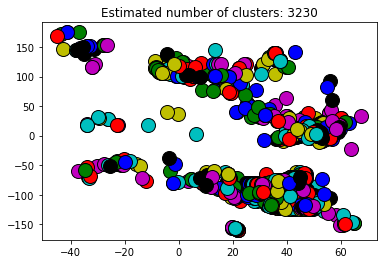

In [38]:
import matplotlib.pyplot as plt
from itertools import cycle

X= checkins_np_part
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(clust.cluster_centers_.shape[0]), colors):
    my_members = clust.labels_ == k
    cluster_center = clust.cluster_centers_[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % clust.cluster_centers_.shape[0])
plt.show()

In [ ]:
#Для вставки в карту
33.751277, -118.188740 {Los Angeles} <green>
25.867736, -80.324116   {Miami} <green>
51.503016, -0.075479 {London} <green>
52.378894, 4.885084 {Amsterdam} <green>
39.366487, 117.036146 {Beijing} <green> 
-33.868457, 151.205134 {Sydney} <green>